# FBA Model  for algal photosynthesis

This is a Flux Balance Analysis (FBA) model of zooxanthellae, using Chlamydomonas, a unicellular dinoflagellate, as a model system. 
In this analysis, I changed the Chlamydomonas model to resemble zooxanthellae as much as possible and then simulated disruptors for its interaction with the coral. 

In [1]:
#import the needed packages
import cobra

#enable autocompleting with tab
%config Completer.use_jedi = False

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [2]:
model_chlamydomonas = cobra.io.read_sbml_model('iRC1080.xml.gz')
model_chlamydomonas.objective = {model_chlamydomonas.reactions.BIOMASS_Chlamy_mixo: 1} #added objective function for biomass production
#model_chlamydomonas


No objective coefficients in model. Unclear what should be optimized


## General exploration

Checking that everything works by knocking out all genes and reactions and looking at the new growth rate. 

In [7]:
#we simulate knockouts of single reactions 
model_chlamydomonas.optimize()
print(model_chlamydomonas.objective.value)
for reaction in model_chlamydomonas.reactions:
    with model_chlamydomonas as model_chlamydomonas:  #not to edit the original model
        reaction.knock_out()
        model_chlamydomonas.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
             (reaction.id, str(reaction.bounds), model_chlamydomonas.objective.value))

6.404693015714799
EX_hxan_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_alltn_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_orn_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_gln__L_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_urate_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_so3_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_s_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_no3_e blocked (bounds: (0, 0)), new growth rate 3.202347
EX_so4_e blocked (bounds: (0, 0)), new growth rate 0.000000
EX_fe2_e blocked (bounds: (0, 0)), new growth rate 6.404693
EX_fe3_e blocked (bounds: (0, 0)), new growth rate 6.404693
PRISM_solar_litho blocked (bounds: (0, 0)), new growth rate 6.404693
PRISM_solar_exo blocked (bounds: (0, 0)), new growth rate 6.404693
PRISM_incandescent_60W blocked (bounds: (0, 0)), new growth rate 6.404693
EX_slnt_e blocked (bounds: (0.0, 0.0)), new growth rate 6.404693
EX_leu__L_e b

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


EX_photonVis_e blocked (bounds: (0, 0)), new growth rate 6.404693
EX_o2_e blocked (bounds: (0, 0)), new growth rate -0.000000
BIOMASS_Chlamy_mixo blocked (bounds: (0, 0)), new growth rate 0.000000
CO2th blocked (bounds: (0, 0)), new growth rate 6.404693
BIOMASS_Chlamy_hetero blocked (bounds: (0, 0)), new growth rate 6.404693
EX_co2_e blocked (bounds: (0, 0)), new growth rate 6.404693
COAth blocked (bounds: (0, 0)), new growth rate 6.404693
CTPth blocked (bounds: (0, 0)), new growth rate -0.000000
ATPM blocked (bounds: (0, 0)), new growth rate 6.404693
DM_apotfen_h blocked (bounds: (0, 0)), new growth rate 6.404693
DM_asnglcnacglcnacman_man_man_c blocked (bounds: (0, 0)), new growth rate 6.404693
CYSth blocked (bounds: (0, 0)), new growth rate -0.000000
DM_bhb_m blocked (bounds: (0, 0)), new growth rate 6.404693
DM_bhb_x blocked (bounds: (0, 0)), new growth rate 6.404693
DM_cat_c blocked (bounds: (0, 0)), new growth rate 6.404693
DHAP_pi_thr blocked (bounds: (0, 0)), new growth rate 6.4

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


DM_photon438_u blocked (bounds: (0, 0)), new growth rate 6.404693
DM_photon450_h blocked (bounds: (0, 0)), new growth rate 0.000000
FE3abch blocked (bounds: (0, 0)), new growth rate 6.404693
DM_photon490_s blocked (bounds: (0, 0)), new growth rate 6.404693


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


KeyboardInterrupt: 

In [ ]:
model_chlamydomonas = cobra.io.read_sbml_model('iRC1080.xml.gz')
model_chlamydomonas.objective = {model_chlamydomonas.reactions.BIOMASS_Chlamy_mixo: 1}

#we simulate gene knockouts directly, this time we are storing the results in a vector and plotting it
genes_ids=[gene.id for gene in model_chlamydomonas.genes]
grow_rates=[]

model_chlamydomonas.optimize()
print(model_chlamydomonas.objective.value)
for gene in model_chlamydomonas.genes:
    with model_chlamydomonas as model_chlamydomonas:  #not to edit the original model
        gene.knock_out()
        model_chlamydomonas.optimize()
        grow_rates.append(model_chlamydomonas.objective.value)
        #print('%s, new growth rate %f' %
              #(gene.id, model_chlamydomonas.objective.value))


In [ ]:
x = np.array(genes_ids)
y = np.array(grow_rates)

plt.hist(y)
plt.xlabel('Growth rates')
plt.ylabel('Number of genes')
#plt.show()
plt.savefig("distribution.png", dpi=100, bbox_inches='tight',pad_inches=0)

In [ ]:
x = np.array(genes_ids)
y = np.array(grow_rates)

fig = plt.figure(figsize=(600, 10))
plt.scatter(x, y)
plt.margins(x=0.001) 
plt.xticks(rotation=90)
plt.show()
plt.savefig("rates.png", dpi=100, bbox_inches='tight',pad_inches=0)

# Changing the growth conditions and examining effect on growth rate and metabolite production

The growth conditions will be changed based on the 'medium', and disrupted as common disruptors of zooxanthellae-coral symbiosis which lead to bleahing


### Looking for essential genes based on medium

In [3]:
medium=model_chlamydomonas.medium
print(medium)

{'EX_no3_e': 10.0, 'EX_so4_e': 10.0, 'EX_fe2_e': 10.0, 'EX_fe3_e': 10.0, 'EX_h_e': 10.0, 'EX_h2o_e': 10.0, 'EX_pi_e': 10.0, 'EX_nh4_e': 10.0, 'EX_mg2_e': 10.0, 'EX_na1_e': 10.0, 'EX_photonVis_e': 2000.0, 'EX_o2_e': 10.0, 'EX_co2_e': 11.16, 'EX_ac_e': 10.0}


In [4]:
model_chlamydomonas_v2=model_chlamydomonas.copy() #we are making a copy of the original model and editing the copy
medium = model_chlamydomonas_v2.medium
medium["EX_pi_e"] = 0.0
model_chlamydomonas_v2.medium = medium
#model_chlamydomonas_v2.medium

model_chlamydomonas_v2.optimize()
model_chlamydomonas_v2.objective.value

ess_genesv2=cobra.flux_analysis.variability.find_essential_genes(model_chlamydomonas_v2)
id_ess_genesv2=[gene.id for gene in ess_genesv2]

ess_genes=cobra.flux_analysis.variability.find_essential_genes(model_chlamydomonas)
id_ess_genes=[gene.id for gene in ess_genes]

a=list(set(id_ess_genesv2) & set(id_ess_genes))
len(a)
list(set(id_ess_genesv2) - set(id_ess_genes)) #A list of essential genes that are related to this medium (ie that are not in the general list of essential genes )

['CRv4_Au5_s17_g7701_t1',
 'CRv4_Au5_s2_g9723_t1',
 'CRv4_Au5_s1_g1020_t1',
 'CRv4_Au5_s15_g5828_t1',
 'CRv4_Au5_s3_g11341_t1',
 'CRv4_Au5_s6_g13523_t1',
 'CRv4_Au5_s4_g11738_t1',
 'CRv4_Au5_s17_g7529_t1',
 'CRv4_Au5_s6_g12872_t1',
 'CRv4_Au5_s2_g8797_t1',
 'CRv4_Au5_s17_g7007_t1',
 'CRv4_Au5_s3_g10641_t1',
 'CRv4_Au5_s12_g3782_t1',
 'CRv4_Au5_s16_g6789_t1',
 'CRv4_Au5_s17_g7113_t1',
 'CRv4_Au5_s12_g3449_t1',
 'CRv4_Au5_s13_g5073_t1',
 'CRv4_Au5_s2_g9234_t1',
 'CRv4_Au5_s8_g15056_t1',
 'CRv4_Au5_s8_g15095_t1',
 'CRv4_Au5_s11_g2553_t1',
 'CRv4_Au5_s1_g1160_t1',
 'CRv4_Au5_s13_g4678_t1',
 'CRv4_Au5_s2_g9250_t1',
 'CRv4_Au5_s3_g10359_t2',
 'CRv4_Au5_s11_g2419_t1',
 'CRv4_Au5_s6_g12638_t1',
 'CRv4_Au5_s1_g1928_t1',
 'CRv4_Au5_s1_g1788_t1',
 'CRv4_Au5_s13_g4519_t1',
 'CRv4_Au5_s19_g8150_t1',
 'CRv4_Au5_s2_g9591_t1',
 'CRv4_Au5_s7_g13855_t1',
 'CRv4_Au5_s14_g5652_t1',
 'CRv4_Au5_s3_g10595_t1',
 'CRv4_Au5_s1_g2188_t1',
 'CRv4_Au5_s16_g6229_t1',
 'CRv4_Au5_s16_g6730_t1',
 'CRv4_Au5_s16_g6473_t

In [180]:
# Carry out GO analysis on large groups of essential genes to sanity-check (EX_pi_e, EX_o2_e)

[]

### Effect of changing medium on growth rate 

In FBA, the objective coefficient is used as a proxy for growth. Changing the values for each 'medium' and looking for effects on growth. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarn

AttributeError: 'Axes' object has no attribute 'twin'

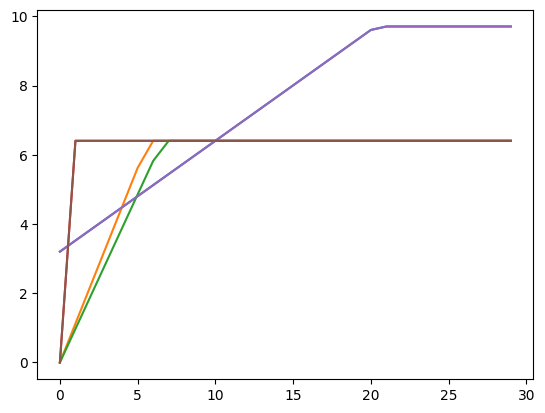

In [6]:
model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_no3_e = range(0,30,1)
growth_EX_no3_e=[]
for flux in EX_no3_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_no3_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_no3_e.append(model_chlamydomonas_v3.objective.value)

model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_o2_e = range(0,30,1)
growth_EX_o2_e=[]
for flux in EX_o2_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_o2_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_o2_e.append(model_chlamydomonas_v3.objective.value)
    
model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_pi_e = range(0,30,1)
growth_EX_pi_e=[]
for flux in EX_pi_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_pi_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_pi_e.append(model_chlamydomonas_v3.objective.value)

model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_co2_e = range(0,30,1)
growth_EX_co2_e=[]
for flux in EX_co2_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_co2_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_co2_e.append(model_chlamydomonas_v3.objective.value)
    
model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_ac_e = range(0,30,1)
growth_EX_ac_e=[]
for flux in EX_ac_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_ac_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_ac_e.append(model_chlamydomonas_v3.objective.value)
    
model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_so4_e = range(0,30,1)
growth_EX_so4_e=[]
for flux in EX_so4_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_so4_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_so4_e.append(model_chlamydomonas_v3.objective.value)
    
model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_h_e = range(0,30,1)
growth_EX_h_e=[]
for flux in EX_h_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_h_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_h_e.append(model_chlamydomonas_v3.objective.value)

model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_nh4_e = range(0,30,1)
growth_EX_nh4_e=[]
for flux in EX_nh4_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_nh4_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_nh4_e.append(model_chlamydomonas_v3.objective.value)

model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_mg2_e = range(0,30,1)
growth_EX_mg2_e=[]
for flux in EX_mg2_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_mg2_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_mg2_e.append(model_chlamydomonas_v3.objective.value)

model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_na1_e = range(0,30,1)
growth_EX_na1_e=[]
for flux in EX_na1_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_na1_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_na1_e.append(model_chlamydomonas_v3.objective.value)
    
model_chlamydomonas_v3 = model_chlamydomonas.copy()
EX_photonVis_e = range(1000,4000,100)
growth_EX_photonVis_e=[]
for flux in EX_na1_e:
    medium = model_chlamydomonas_v3.medium
    medium["EX_photonVis_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_photonVis_e.append(model_chlamydomonas_v3.objective.value)
    
ax1 = plt.subplot()
ax1.plot(EX_no3_e, growth_EX_no3_e, label = 'nitrate')
ax1.plot(EX_o2_e, growth_EX_o2_e, label = 'oxygen')
ax1.plot(EX_no3_e, growth_EX_pi_e, label = 'phosphate')
#ax1.plot(EX_co2_e, growth_EX_co2_e, label = 'CO2')
#ax1.plot(EX_ac_e, growth_EX_ac_e, label = 'acetate')
ax1.plot(EX_so4_e, growth_EX_so4_e, label = 'sulfate')
#ax1.plot(EX_h_e, EX_h_e, label = 'proton')
ax1.plot(EX_nh4_e, growth_EX_nh4_e, label = 'ammonia')
ax1.plot(EX_mg2_e, growth_EX_mg2_e, label = 'magnesium')
#ax1.plot(EX_na1_e, growth_EX_na1_e, label = 'sodium')
ax2 = ax1.twin()
ax2.plot(EX_photonVis_e, growth_EX_photonVis_e, label = 'photon')
plt.title('Medium exchange rate effects on Chlamydomonas growth')
plt.xlabel('Exchange')
plt.ylabel('Chlamydomonas Growth rate')
plt.legend(loc = 'lower right', frameon = True)
plt.show()



In [25]:
df_levels = pd.concat([pd.DataFrame(EX_no3_e),pd.DataFrame(EX_o2_e), pd.DataFrame(EX_pi_e), pd.DataFrame(EX_so4_e), pd.DataFrame(EX_nh4_e), pd.DataFrame(EX_mg2_e), pd.DataFrame(EX_photonVis_e)])
df_growth_rate = pd.concat([pd.DataFrame(growth_EX_no3_e),pd.DataFrame(growth_EX_o2_e), pd.DataFrame(growth_EX_pi_e), pd.DataFrame(growth_EX_so4_e), pd.DataFrame(growth_EX_nh4_e), pd.DataFrame(growth_EX_mg2_e), pd.DataFrame(growth_EX_photonVis_e)])




In [38]:
no3 = pd.DataFrame(EX_no3_e, growth_EX_no3_e)
no3.to_csv("no3.csv")

o2 = pd.DataFrame(EX_o2_e, growth_EX_o2_e)
o2.to_csv("o2.csv")

EX_pi_e = pd.DataFrame(EX_pi_e, growth_EX_pi_e)
EX_pi_e.to_csv("pi.csv")

EX_so4_e = pd.DataFrame(EX_so4_e, growth_EX_so4_e)
EX_so4_e.to_csv("so4.csv")

EX_nh4_e = pd.DataFrame(EX_nh4_e, growth_EX_nh4_e)
EX_nh4_e.to_csv("EX_nh4_e.csv")

EX_mg2_e = pd.DataFrame(EX_mg2_e, growth_EX_mg2_e)
EX_mg2_e.to_csv("EX_mg2_e.csv")

EX_photonVis_e = pd.DataFrame(EX_photonVis_e, growth_EX_photonVis_e)
EX_photonVis_e.to_csv("EX_photon_e.csv")

In [39]:
no3

,0
3.202347,0
3.522581,1
3.842816,2
4.163050,3
4.483285,4
4.803520,5
5.123754,6
5.443989,7
5.764224,8
6.084458,9


### Effect of changing the medium on the rates of important reactions

- Reactions that produce the products of photosynthesis (ie that will be given to the coral)
- Potentially plot all of the reactions together

In [4]:
from cobra.flux_analysis import flux_variability_analysis

model_chlamydomonas_v3 = model_chlamydomonas.copy()
model_chlamydomonas_v3.reactions.get_by_id("EX_photonVis_e").upper_bound = 4000.
model_chlamydomonas_v3.reactions.get_by_id("EX_photonVis_e").lower_bound = 1000.

EX_mg2_e = range(0,30,1)
growth_EX_mg2_e=[]
for flux in EX_mg2_e:
    medium = model_chlamydomonas_v3.medium
    medium["BCAROKT"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    growth_EX_mg2_e.append(flux_variability_analysis(model_chlamydomonas_v3, model_chlamydomonas_v3.reactions.get_by_id("H2O2tm")))

x_axis=Ex_photonvis_e                         
plt.plot(x_axis, growth_EX_mg2_e)
plt.title('Medium effects on mixotropic chlamydomonas biomass production')
plt.xlabel('Exchange rate from media')
plt.ylabel('Flux through beta-carotene')
plt.legend(loc = 'upper right', frameon = True)
plt.show()

BCAROKT does not seem to be an an exchange reaction. Applying bounds anyway.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Infeasible: There is no optimal solution for the chosen objective! (infeasible).

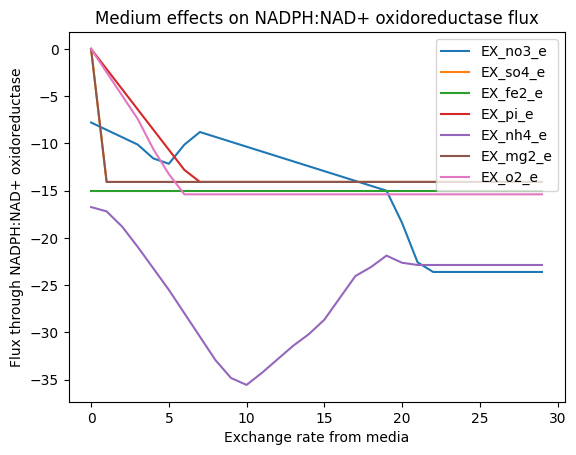

In [12]:
medium_names = ['EX_no3_e', 'EX_so4_e', 'EX_fe2_e', 'EX_pi_e',
                'EX_nh4_e', 'EX_mg2_e', 'EX_o2_e']

exchange_rate = range(0,30,1)

for i in range(len(medium_names)):
    model_chlamydomonas_v3 = model_chlamydomonas.copy()
    growth = []
    for flux in exchange_rate:
        medium = model_chlamydomonas_v3.medium
        medium[medium_names[i]]=flux
        model_chlamydomonas_v3.medium = medium
        opt = model_chlamydomonas_v3.optimize()        
        growth.append(opt.fluxes['NNOR'])
    plt.plot(exchange_rate, growth, label = medium_names[i])

plt.title('Medium effects on NADPH:NAD+ oxidoreductase flux')
plt.xlabel('Exchange rate from media')
plt.ylabel('Flux through NADPH:NAD+ oxidoreductase')
plt.legend(loc = 'upper right', frameon = True)
plt.show()


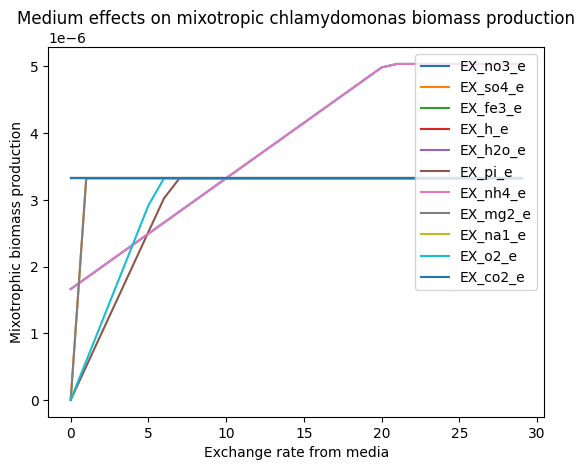

In [13]:
medium_names = ['EX_no3_e', 'EX_so4_e', 'EX_fe3_e', 'EX_h_e', 'EX_h2o_e', 'EX_pi_e',
                'EX_nh4_e', 'EX_mg2_e', 'EX_na1_e', 'EX_o2_e', 'EX_co2_e']#, 'EX_ac_e']

exchange_rate = range(0,30,1)

for i in range(len(medium_names)):
    model_chlamydomonas_v3 = model_chlamydomonas.copy()
    growth = []
    for flux in exchange_rate:
        medium = model_chlamydomonas_v3.medium
        medium[medium_names[i]]=flux
        model_chlamydomonas_v3.medium = medium
        opt = model_chlamydomonas_v3.optimize()        
        growth.append(opt.fluxes['CAROMO'])
    plt.plot(exchange_rate, growth, label = medium_names[i])

plt.title('Medium effects on mixotropic chlamydomonas biomass production')
plt.xlabel('Exchange rate from media')
plt.ylabel('Mixotrophic biomass production')
plt.legend(loc = 'upper right', frameon = True)
plt.show()


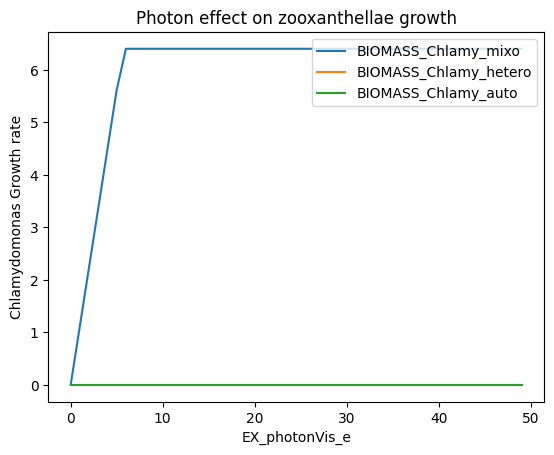

In [41]:
model_chlamydomonas_v3 = model_chlamydomonas.copy()

photon_uptakes = range(0, 50,1)

BIOMASS_Chlamy_mixo=[]
BIOMASS_Chlamy_hetero=[]
BIOMASS_Chlamy_auto=[]

for flux in photon_uptakes:
    medium = model_chlamydomonas_v3.medium
    medium["EX_o2_e"]=flux
    model_chlamydomonas_v3.medium = medium
    opt = model_chlamydomonas_v3.optimize()
    model_chlamydomonas_v3.optimize()
    #growth.append(model_chlamydomonas_v3.objective.value)
    
    BIOMASS_Chlamy_mixo.append(opt.fluxes['BIOMASS_Chlamy_mixo'])
    BIOMASS_Chlamy_hetero.append(opt.fluxes['BIOMASS_Chlamy_hetero'])
    BIOMASS_Chlamy_auto.append(opt.fluxes['BIOMASS_Chlamy_auto'])

    #print(opt.fluxes['DM_photon450_h'])

x_axis=photon_uptakes
plt.plot(x_axis, BIOMASS_Chlamy_mixo, label = 'BIOMASS_Chlamy_mixo')
plt.plot(x_axis, BIOMASS_Chlamy_hetero, label = 'BIOMASS_Chlamy_hetero')
plt.plot(x_axis, BIOMASS_Chlamy_auto, label = 'BIOMASS_Chlamy_auto')
plt.title('Photon effect on zooxanthellae growth')
plt.xlabel('EX_photonVis_e')
plt.ylabel('Chlamydomonas Growth rate')
plt.legend(loc = 'upper right', frameon = True)
plt.show()


In [72]:
growth_EX_mg2_e

[0.0]

In [53]:
model_chlamydomonas.reactions.get_by_id('EX_photonVis_e')

Reaction identifier,EX_photonVis_e
Name,Photon emission
Memory address,0x7fb1c2b60070
Stoichiometry,"photonVis_e <-- Photon (380 to 750 nm, visible spectrum) <--"
GPR,
Lower bound,-2000.0
Upper bound,0.0


In [272]:
model_chlamydomonas.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
2.58%,5.404,ATP_3h_th,adp_c + atp_h + 3.0 h_c --> adp_h + atp_c + 3.0 h_h
6.45%,13.54,GTPDPK_1,atp_c + gtp_c <=> amp_c + gdptp_c
56.88%,119.4,PC,atp_c + hco3_c + pyr_c <=> adp_c + h_c + oaa_c + pi_c
34.09%,71.53,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
Percent,Flux,Reaction,Definition
0.29%,-0.5998,ACGK,acglu_c + atp_c --> acg5p_c + adp_c
0.29%,-0.5998,ARGSS_1,asp__L_c + atp_c + citr__L_c --> amp_c + argsuc_c + 2.0 h_c + ppi_c
0.21%,-0.4454,ASNS1,asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c + asn__L_c + glu__L_c + h_c + ppi_c
0.09%,-0.183,ATPM,atp_c + h2o_c --> adp_c + h_c + pi_c
0.04%,-0.08155,ATPPRT,atp_c + prpp_c --> ppi_c + prbatp_c
